In [2]:
from parse_touchpad_data import TouchpadData
import pandas as pd
import numpy as np

from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.legend_handler import HandlerLine2D, HandlerTuple
import matplotlib as mpl
import itertools

from scipy import stats
from scipy import linalg

from sklearn.mixture import BayesianGaussianMixture

from PIL import Image

In [129]:
legal = TouchpadData('../touchpad_capture/real_data/legal')
illegal = TouchpadData('../touchpad_capture/real_data/illegal')

touches = np.concatenate((legal.data, illegal.data))
touches = np.clip(touches, a_min=-10, a_max=245)

nontouches = np.array(TouchpadData('../touchpad_capture/real_data/nontouches').data)
nontouches = np.clip(nontouches, a_min=-10, a_max=245)

In [130]:
touches_vars = np.var(touches, axis=(1,2))
touches_means = np.mean(touches, axis=(1,2))
touches_max_values = np.max(touches, axis=(1,2))

nontouches_vars = np.var(nontouches, axis=(1,2))
nontouches_means = np.mean(nontouches, axis=(1,2))
nontouches_max_values = np.max(nontouches, axis=(1,2))

# legal_vars = np.var(legal.data, axis=(1,2))
# legal_means = np.mean(legal.data, axis=(1,2))
# legal_max_values = np.max(legal.data, axis=(1,2))

# illegal_vars = np.var(illegal.data, axis=(1,2))
# illegal_means = np.mean(illegal.data, axis=(1,2))
# illegal_max_values = np.max(illegal.data, axis=(1,2))

In [131]:
# Create dataframe for features
data = pd.concat([
    pd.DataFrame({'vars': touches_vars, 'means': touches_means, 'max_values': touches_max_values, 'touches': True}),
    pd.DataFrame({'vars': nontouches_vars, 'means': nontouches_means, 'max_values': nontouches_max_values, 'touches': False})
])

In [6]:

# sns.jointplot(data=data, x="vars", y="max_values", hue="touches", marker="+")
# sns.jointplot(data=data, x="vars", y="means", hue="touches", marker="+")
# sns.jointplot(data=data, x="means", y="max_values", hue="touches", marker="+")

In [132]:
nontouch_data = data.loc[data['touches'] == False, ['max_values', 'vars', 'means']]
touch_data = data.loc[data['touches'] == True, ['max_values', 'vars', 'means']]

bgm = BayesianGaussianMixture().fit(nontouch_data)

log_probs = pd.Series(bgm.score_samples(touch_data))

touch_data['log_probs'] = log_probs

,max_values,vars,means,log_probs
57,10,1.609749,0.342308,-7.270915
158,17,3.448802,0.234615,-26.887054
165,7,1.168328,-0.188462,-7.017517
236,12,1.987737,-0.026923,-16.299462
342,12,2.091361,-0.030769,-16.013463
...,...,...,...,...
2734,25,4.808802,0.365385,-65.929746
2735,18,3.199172,0.092308,-36.406168
2749,13,2.129275,0.073077,-17.728321
2752,12,1.734246,-0.019231,-17.061716


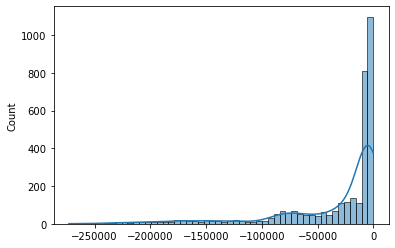

In [148]:
sns.histplot(log_probs_nontouch, kde=True)
#everything above 82.75 can be easily discarded, maybe 82.5 to be sure.
start = np.percentile(log_probs, 82.75
)
end = np.percentile(log_probs, 85
)


results = touch_data.loc[(touch_data.log_probs > start) & (touch_data.log_probs < end)]


for i in results.index:
    plt.imsave('out/{}.png'.format(i), np.asarray(touches[i], int), cmap='gist_heat', vmin=-10, vmax=245)

for i in results.index:
    plt.imsave('out/{}.png'.format(i), np.asarray(touches[i], int), cmap='gist_heat', vmin=-10, vmax=245)

results

In [110]:
i=536
plt.imsave('out/{}.png'.format(i), touches[i], cmap='gist_heat')
# img = Image.fromarray(touches[536])
# img.save("out/536.png")

In [ ]:
sns.displot(touch_data['log_probs'], kind="kde")


In [106]:
sum(log_probs < log_probs[728]) / len(log_probs_nontouch)

0.8528099910793934

In [ ]:
start = -2.9
end = 0
touch_data[(touch_data["log_probs"] > start) & (touch_data["log_probs"] < end)]

In [ ]:
log_probs.argmax()
results = touch_data[touch_data["log_probs"] > 0 & touch_data["log_probs"] < 0.5].index
for i in results:
    # array = 

    # array = array - array.min()
    # array = array / array.max() * 255
    im = Image.fromarray(touches[i])
    
    im.save("out/{}.png".format(i))
    

array([[ 0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  1,  3,  3,  1,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  1,  2,  3,  1,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0,  0,  2,  2,  1,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  0,  2,  2,  2,  0,  0,  1,  3,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  2,  1,  2,
         0,  0,  1, -1],
       [ 0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0

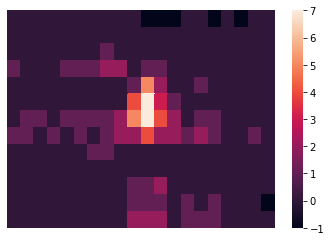

In [107]:
touches_orig = np.concatenate((legal.data, illegal.data))

sns.heatmap(touches_orig[728], xticklabels=False, yticklabels=False)

touches_orig[1073]

In [117]:
touches_orig.max()

244

In [124]:
touch1073 = touches_orig[1073]
plt.imsave('out/touch1073.png', touch1073, cmap='gist_heat', vmin=-255, vmax=255)

image = Image.open('out/touch1073.png').convert('L')
datakkt = np.asarray(image)
datakkt

array([[57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
        57, 57, 57, 57],
       [57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
        57, 57, 57, 57],
       [57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
        57, 57, 57, 57],
       [57, 57, 57, 57, 57, 57, 57, 57, 57, 59, 59, 57, 57, 57, 57, 57,
        57, 57, 57, 57],
       [57, 57, 57, 57, 57, 57, 57, 57, 57, 59, 59, 57, 57, 57, 57, 57,
        57, 57, 57, 57],
       [57, 57, 57, 57, 57, 57, 57, 57, 57, 59, 59, 57, 57, 57, 57, 57,
        57, 57, 57, 57],
       [57, 57, 57, 57, 57, 57, 57, 57, 57, 59, 59, 59, 57, 57, 57, 59,
        57, 57, 57, 57],
       [57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 59, 57, 59,
        57, 57, 57, 57],
       [57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
        57, 57, 57, 57],
       [57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57, 57,
        57, 57, 57, 57],
       [57, 57, 57, 57, 57, 57

<AxesSubplot:>

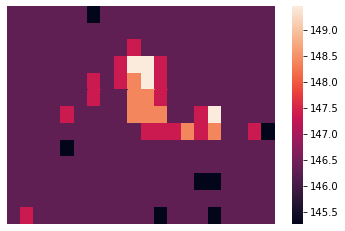

In [119]:
touch1073 = touch1073 / (touches_orig.max() / 255)
sns.heatmap(touch1073, xticklabels=False, yticklabels=False)

In [ ]:
touches = data[data['touches']==True]
touches['probabilities'] = probabilities

In [ ]:
probabilities.min()

In [ ]:
sns.jointplot(x={"Touches": touches_means, "Non touches": nontouches_means}, y={"Touches": touches_max_values, "Non touches": nontouches_max_values}, kind="reg")

In [ ]:
arrays = (touches_vars, nontouches_vars)
gaussians = []

xmin = float('inf')
xmax = float('-inf')

for x in arrays:
    mean = np.mean(x)
    std = np.std(x)

    start = mean - 3 * std
    if start < xmin:
        xmin = start

    end = mean + 3 * std
    if end > xmax:
        xmax = end

x = np.linspace(xmin, xmax, 100)
for array in arrays:
    mean = np.mean(array)
    std = np.std(array)

    norm = stats.norm.pdf(array, mean, std)
    print(norm)
    # gaussians.append(np.sqrt(norm))

# touches_norm, nontouches_norm = tuple(gaussians)

# p1,p2 = plt.plot(
#     x, touches_norm, 'b-',
#     x, nontouches_norm, 'r-',
#     )
# labels = ['Touches', 'Non touches', 'Legal', 'Illegal']
# plt.legend([p1, p2], labels)
# plt.ylabel('p(x)')
# plt.xlabel('Vars')
# plt.yticks([])




In [ ]:
mean = np.mean(touches_vars)
sd = np.std(touches_vars)
mean, sd

In [ ]:
legal_vars = np.var(legal.data, axis=(1,2))
illegal_vars = np.var(illegal.data, axis=(1,2))

p11,p12,p13,p14 = plt.plot(
    touches_vars, np.zeros_like(touches_vars), 'b.',
    nontouches_vars, np.zeros_like(nontouches_vars), 'r.',
    legal_vars, np.zeros_like(legal_vars), 'c.',
    illegal_vars, np.zeros_like(illegal_vars), 'm.',
    zorder=3, markersize=10)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

mu, std = stats.norm.fit(touches_vars)
touches_norm = stats.norm.pdf(x,  mu, std)

mu, std = stats.norm.fit(nontouches_vars)
nontouches_norm = stats.norm.pdf(x, mu, std)

mu, std = stats.norm.fit(legal_vars)
legal_norm = stats.norm.pdf(x, mu, std)

mu, std = stats.norm.fit(illegal_vars)
illegal_norm = stats.norm.pdf(x, mu, std)

p21,p22, p23, p24 = plt.plot(
    x, touches_norm, 'b-',
    x, nontouches_norm, 'r-',
    x, legal_norm, 'c-',
    x, illegal_norm, 'm-',
    )

labels = ['Touches (Legal + Illegal)', 'Nontouches', 'Legal', 'Illegal']
plt.legend([p11, p12, p13, p14], labels)
plt.ylabel('p(x)')
plt.xlabel('Vars')

In [ ]:
legal_vars = np.var(legal.data, axis=(1,2))
illegal_vars = np.var(illegal.data, axis=(1,2))

p11,p12,p13,p14 = plt.plot(
    touches_vars, np.zeros_like(touches_vars), 'b.',
    nontouches_vars, np.zeros_like(nontouches_vars), 'r.',
    legal_vars, np.zeros_like(legal_vars), 'c.',
    illegal_vars, np.zeros_like(illegal_vars), 'm.',
    zorder=3, markersize=10, alpha=0.01)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

mu, std = stats.norm.fit(touches_vars)
touches_norm = stats.norm.pdf(x,  mu, std)

mu, std = stats.norm.fit(nontouches_vars)
nontouches_norm = stats.norm.pdf(x, mu, std)

mu, std = stats.norm.fit(legal_vars)
legal_norm = stats.norm.pdf(x, mu, std)

mu, std = stats.norm.fit(illegal_vars)
illegal_norm = stats.norm.pdf(x, mu, std)

p21,p22, p23, p24 = plt.plot(
    x, touches_norm, 'b-',
    x, nontouches_norm, 'r-',
    x, legal_norm, 'c-',
    x, illegal_norm, 'm-',
    )

labels = ['Touches', 'Nontouches', 'Legal', 'Illegal']
plt.legend([p11, p12, p13, p14], labels)
plt.ylabel('p(x)')
plt.xlabel('Vars')

In [ ]:
xmin, xmax = np.min(np.concatenate((legal_vars, illegal_vars, touches_vars, nontouches_vars))), np.max(np.concatenate((legal_vars, illegal_vars, touches_vars, nontouches_vars)))
xmin, xmax

In [ ]:
legal_means = np.mean(legal.data, axis=(1,2))
illegal_means = np.mean(illegal.data, axis=(1,2))

p11,p12,p13,p14 = plt.plot(
    touches_means, np.zeros_like(touches_means), 'b.',
    nontouches_means, np.zeros_like(nontouches_means), 'r.',
    legal_means, np.zeros_like(legal_means), 'c.',
    illegal_means, np.zeros_like(illegal_means), 'm.',
    zorder=3, markersize=10)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

mu, std = stats.norm.fit(touches_means)
touches_norm = stats.norm.pdf(x,  mu, std)

mu, std = stats.norm.fit(nontouches_means)
nontouches_norm = stats.norm.pdf(x, mu, std)

mu, std = stats.norm.fit(legal_means)
legal_norm = stats.norm.pdf(x, mu, std)

mu, std = stats.norm.fit(illegal_means)
illegal_norm = stats.norm.pdf(x, mu, std)

p21,p22, p23, p24 = plt.plot(
    x, touches_norm, 'b-',
    x, nontouches_norm, 'r-',
    x, legal_norm, 'c-',
    x, illegal_norm, 'm-',
    )

labels = ['Touches (Legal + Illegal)', 'Nontouches', 'Legal', 'Illegal']
plt.legend([p11, p12, p13, p14], labels)
plt.ylabel('p(x)')
plt.xlabel('Means')

In [ ]:
legal_max_values = np.max(legal.data, axis=(1,2))
illegal_max_values = np.max(illegal.data, axis=(1,2))

p11,p12,p13,p14 = plt.plot(
    touches_max_values, np.zeros_like(touches_max_values), 'b.',
    nontouches_max_values, np.zeros_like(nontouches_max_values), 'r.',
    legal_max_values, np.zeros_like(legal_max_values), 'c.',
    illegal_max_values, np.zeros_like(illegal_max_values), 'm.',
    zorder=3, markersize=10)

xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)

mu, std = stats.norm.fit(touches_max_values)
touches_norm = stats.norm.pdf(x,  mu, std)

mu, std = stats.norm.fit(nontouches_max_values)
nontouches_norm = stats.norm.pdf(x, mu, std)

mu, std = stats.norm.fit(legal_max_values)
legal_norm = stats.norm.pdf(x, mu, std)

mu, std = stats.norm.fit(illegal_max_values)
illegal_norm = stats.norm.pdf(x, mu, std)

p21,p22, p23, p24 = plt.plot(
    x, touches_norm, 'b-',
    x, nontouches_norm, 'r-',
    x, legal_norm, 'c-',
    x, illegal_norm, 'm-',
    )

labels = ['Touches (Legal + Illegal)', 'Nontouches', 'Legal', 'Illegal']
plt.legend([p11, p12, p13, p14], labels)
plt.ylabel('p(x)')
plt.xlabel('Max values')

In [ ]:
mins

In [ ]:
maxes

In [ ]:
np.where(touches_median < 0)

In [ ]:
sns.heatmap(touches[1801], xticklabels=False, yticklabels=False)

In [ ]:
sns.heatmap(touches[89], xticklabels=False, yticklabels=False, fmt="d")

In [ ]:
sns.heatmap(illegal.data[220], xticklabels=False, yticklabels=False)
